# Функция правдоподобия, информация Фишера и оценка Рао-Крамера
---


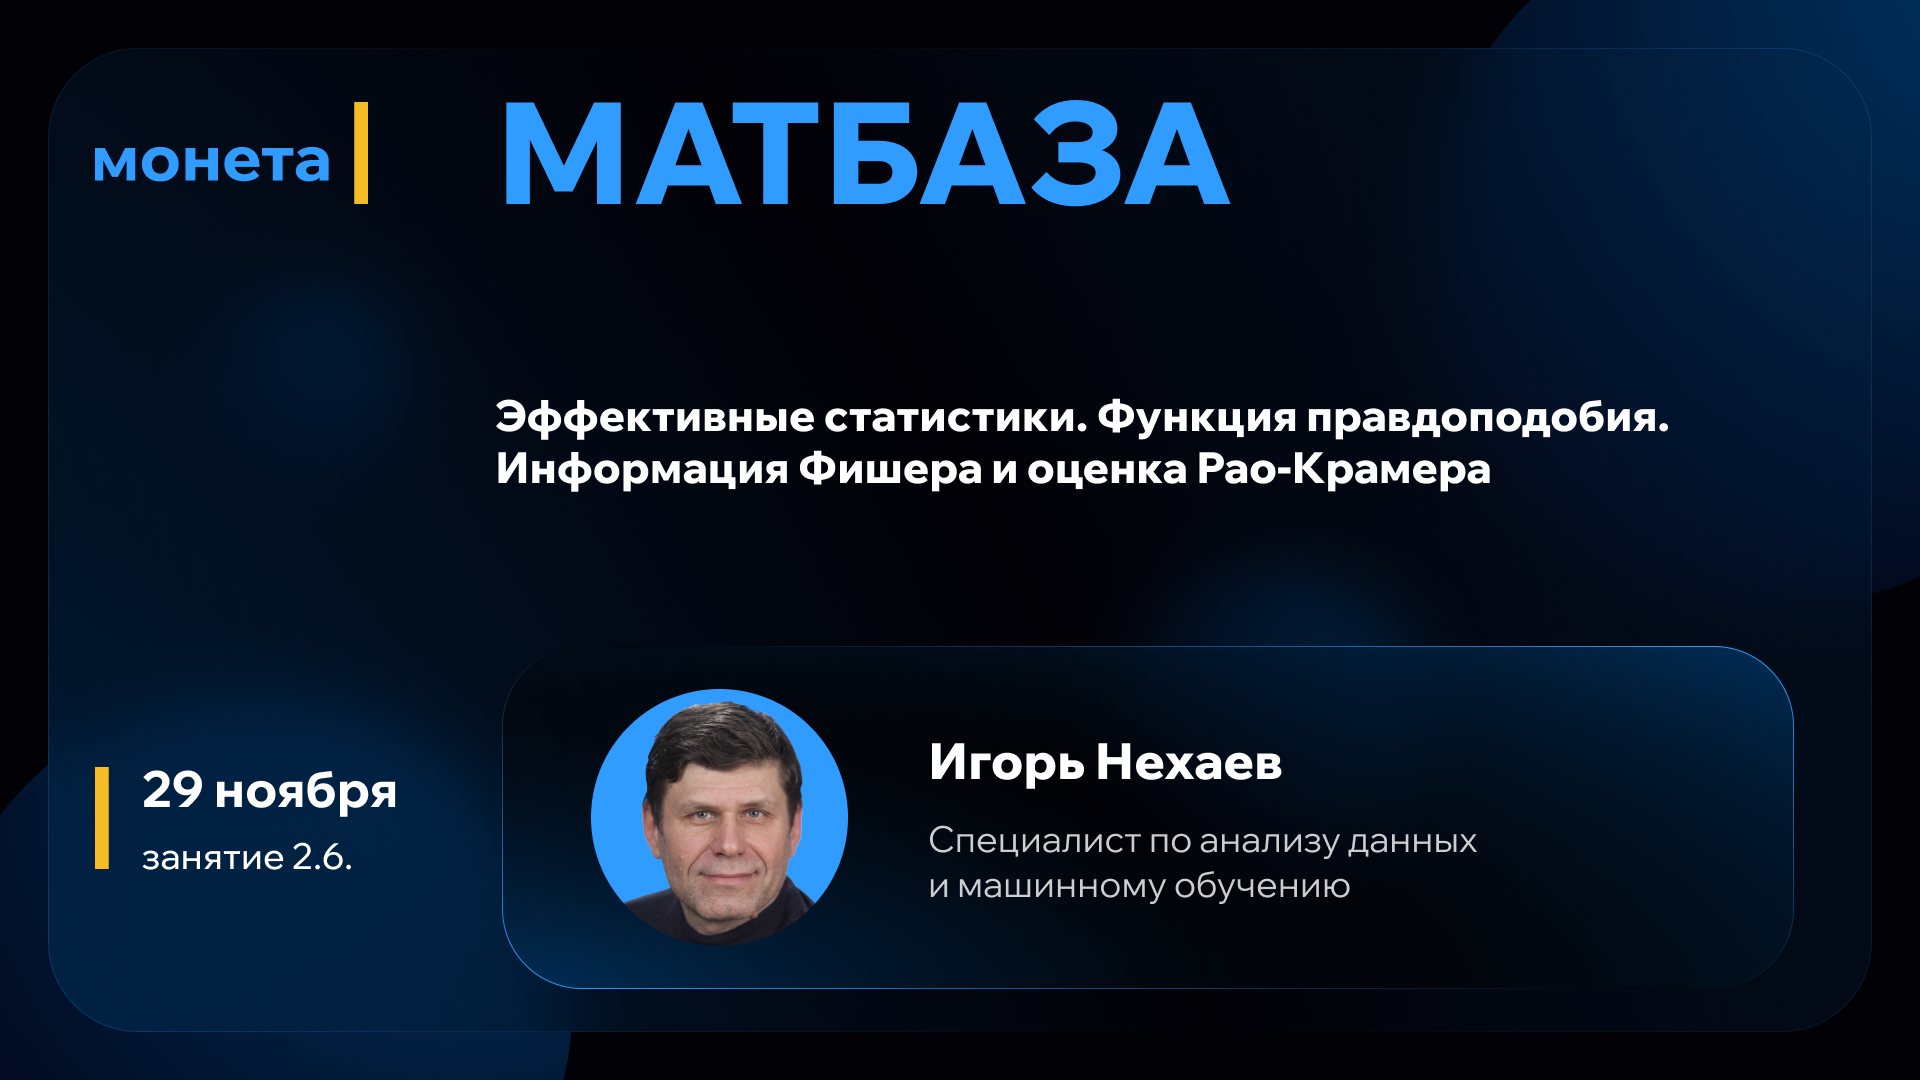

> - Эффективная статистика
> - Функция правдоподобия; оценка максимального правдоподобия;
> - Информация Фишера. Нижняя граница дисперсии несмещенной оценки Рао-Крамера

### **Эффективность оценки**
---
Пусть СВ **X** подчиняется некоторому закону распределения с параметром $Θ$ и плотностью $f_X(x, Θ)$, зависящем от данного параметра.

Например, для экспоненциального распределения $Θ = T_{ср}$ и $f_X(x, T_{ср}) = \frac {1}{T_{ср}} \cdot e^{-x/T_{ср}}$

В более общем случае, у плотности может быть несколько параметров, тогда параметр $Θ$ можно считать вектором параметров.

И пусть мы имеем некоторую выборку размером n: $$\bar X_n = (X_1, ..., X_n).$$

На основании этой выборки мы вычисляем некоторую статистику, которая является оценкой параметра $Θ$:

$$\hat \Theta_n = f(\bar X_n)$$



Мы выяснили, что хорошая оценка параметра должна быть несмещенной и состоятельной. Но стремление дисперсии состоятельной оценки к нулю может быть разным. И, если есть возможность выбирать оценки, то из всех несмещенных и состоятельных надо выбирать ту, у которой дисперсия при фиксированном **n** наименьшая (при любых фиксированых **n**).

Т.е., если есть несмещенные и состоятельные оценки одного и того же параметра $Θ$:

$$\hat \Theta_n = f(\bar X_n)$$
и
$$\hat \Theta^{(i)}_n = f_i(\bar X_n),$$
то выбрать надо ту оценку, у которой дисперсия наименьшая:

$$D_{\hat \Theta_n} \le D_{\hat \Theta^{(i)}_n} \; \forall n=1..\infty, \, \forall i$$

**Опр.** Оценка $\hat \Theta_n$ параметра $\Theta$ называется эффективной, если она является несмещенной, состоятельной и имеет наименьшую возможную дисперсию.

Мы хотим научиться строить и/или выбирать самые эффективные оценки параметров. Для этого надо познакомиться с методом максмиального правдоподобия для построения таких оценок. И научиться оценивать снизу дисперсию статистики.

## **Функция правдоподобия**
---
(см. https://en.wikipedia.org/wiki/Likelihood_function)

Пусть у нас есть НСВ **X**, которая подчиняется некоторому закону распределения с параметром $Θ$ и плотностью $f_X(x, Θ)$.

И пусть мы в результате наблюдений СВ **X** имеем выборку ее значений **$\bar X$** размера n. Так как каждое значение СВ X мы получали независимо от других полученных значений в отдельном эксперименте, то тогда вероятность получения выборки будет равна произведению вероятностей получению каждого отдельного значения:

$$p(\bar X = (x_1, .., x_n)) = ∏_{i=1}^n {p(X=x_i)} = ∏_{i=1}^n {f_X(x_i, θ) dx_i}$$

**Опр.** Функцией правдоподобия параметра распределения $θ$ при полученной выборке $\bar X = (x_1, .., x_n)$ будем называть функцию, которая равна (или пропорциональна) вероятности появления данной выборки при данном значении параметра $θ$:
$$likelihood(\theta | x_1, .., x_n) = L(θ | \bar X) = ∏_{i=1}^n {f_X(x_i, θ)}$$

Понятно название данной функции - чем более вероятные значения мы получим в выборке при данном параметре, тем больше будет и функция правдоподобия.

Функция правдоподобия для НСВ есть не что иное, как плотность распределения для векторной СВ $\bar X$:

$$L(θ | \bar X) = f_{\bar X}(x_1, ..., x_n | θ).$$

С учетом независимости СВ $X_i$ имеем

$$L(θ | \bar X) = f_{\bar X}(x_1, ..., x_n | θ) = ∏_{i=1}^n {f_X(x_i, θ)}.$$

Действительно:
$$\int .. \int L(θ | \bar X) dx_1 .. dx_n = \int .. \int f_X(x_1, θ) \cdot .. \cdot f_X(x_n, θ) dx_1 .. dx_n = \int f_X(x_1, θ) dx_1 \cdot .. \int f_X(x_n, θ) dx_n = 1 \cdot .. \cdot 1 = 1$$





Для ДСВ X функция правдоподобия

- для одного наблюдения будет совпадать с функцией вероятности при данном параметре:
$$L(θ | x) = p_θ(x) = P(X=x | θ)$$

- для выборки будет равна вероятности появления данной выборки при данном параметре $θ$:
$$L(θ | \bar X) = \prod_{i=1}^n p_θ(x_i)$$

Иногда удобнее работать с логарифмом от функции правдоподобия:
- для НСВ
$$\log L(θ | \bar X) = \sum_{i=1}^n {\log f_X(x_i, θ)}$$
- для ДСВ
$$\log L(θ | \bar X) = \sum_{i=1}^n {\log p_θ(x_i)}$$


### ПРИМЕР вычисления функции правдоподобия для НСВ
---
Пусть СВ X="Рост сотрудников компании" подчиняется нормальному закону распределения с параметрами $m_X = 172, \; σ = 8$.

Пусть мы измерили рост трех человек из одного отдела (173, 169, 175) и трех человек из другого отдела (179, 182, 185).

Какие измерения являются более правдоподобными (см. рис. ниже)?

In [ ]:
# подгружаем нужные библиотеки и устанавливаем нужные значения параметров
import numpy as np
np.set_printoptions(precision=3)
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

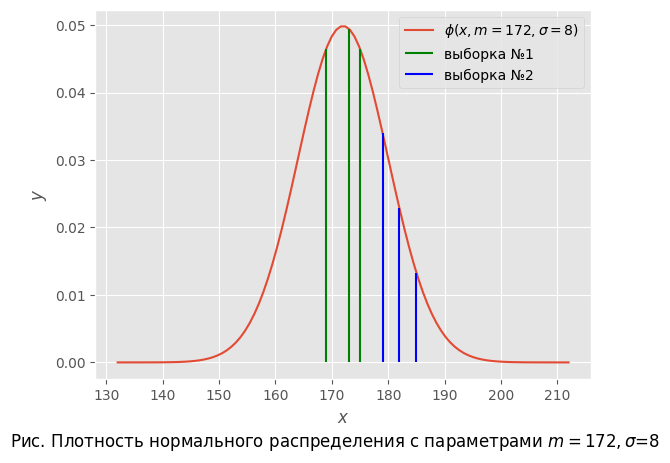

In [ ]:
mu = 172; sigma = 8
norm_rv = stats.norm(loc=mu, scale=sigma)
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 100)
X1 = np.array([173.0, 169., 175.])
X2 = np.array([179.0, 182., 185.])

plt.plot(x, norm_rv.pdf(x), label=f'$\phi(x, m={mu}, \sigma = {sigma})$')
plt.vlines(X1, ymin=0, ymax=norm_rv.pdf(X1), color='green', label='выборка №1')
plt.vlines(X2, ymin=0, ymax=norm_rv.pdf(X2), color='blue', label='выборка №2')
plt.ylabel('$y$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. Плотность нормального распределения с параметрами $m={mu}, \sigma$={sigma}', y=0);

In [ ]:
print(f"Likelihood(X1) = {np.array(norm_rv.pdf(X1)).prod()}")
print(f"Likelihood(X2) = {np.array(norm_rv.pdf(X2)).prod()}")
print(f"logLikelihood(X1) = {np.array(norm_rv.logpdf(X1)).sum()}")
print(f"logLikelihood(X2) = {np.array(norm_rv.logpdf(X2)).sum()}")


Likelihood(X1) = 0.00010690417081476738
Likelihood(X2) = 1.0339746303255347e-05
logLikelihood(X1) = -9.143577724653525
logLikelihood(X2) = -11.479515224653525


### ПРИМЕР использования функции правдоподобия для подбора параметра m
---
Пусть мы знаем, что СВ X="Рост сотрудников компании" подчиняется нормальному закону распределения. При этом мы знаем параметр $σ = 8$ (взяли средний по центральной части России) и хотим оценить параметр $m$ - генеральное среднее по компании.

Пусть мы измерили рост пяти человек из разных отделов (173, 169, 175, 182, 185).

Какое значение параметра $m$ является более правдоподобным: 174, 176 или 178?

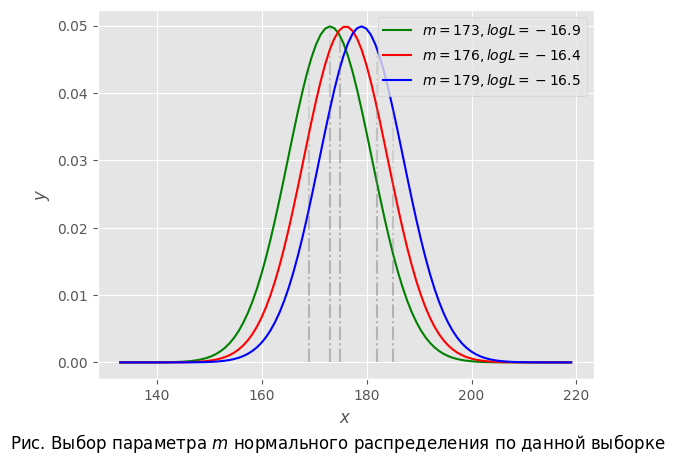

In [ ]:
X_i = np.array([173.0, 169., 175., 182., 185.])
sigma = 8

mu_j = np.array([173.0, 176., 179.])
x = np.linspace(min(mu_j) - 5 * sigma, max(mu_j) + 5 * sigma, 100)
clrs = ['green', 'red', 'blue']

for j, mu in enumerate(mu_j):
    norm_rv = stat.norm(loc=mu, scale=sigma)
    logLikelihood = round(norm_rv.logpdf(X_i).sum(), 1)
    plt.plot(x, norm_rv.pdf(x), label=f'$m={round(mu)}, logL={logLikelihood}$', color=clrs[j])
    plt.vlines(X_i, ymin=0, ymax=norm_rv.pdf(X_i), color='grey', alpha=0.2, linestyle='-.')

plt.ylabel('$y$'); plt.xlabel('$x$')
plt.legend()
plt.suptitle(f'Рис. Выбор параметра $m$ нормального распределения по данной выборке', y=0);

In [ ]:
X_i.mean()

176.8

## **Оценка максимального правдоподобия**
---


Основная идея использования функции правдоподобия при построении оценки заключается в том, чтобы оценку выбрать так, чтобы максимизировать функцию правдоподобия на выборке:

$$L(\hat Θ_n(\bar X) | \bar X) = ∏_{i=1}^n {f_X(x_i, \hat Θ)} →^{\hat Θ} \max$$

Т.е. задача - найти статистику, которая дает максимум функции на любой выборке.

На практике часто работают с логарифмом от функции правдоподобия:

$$\log L(\hat Θ | \bar X) = \sum_{i=1}^n {\log f_X(x_i, \hat Θ)} → \max$$

### ПРИМЕР построения оценки максимального правдоподобия в случае с ДСВ
---
Рассмотрим СВ X, распределенную по закону Бернулли с параметром p, т.е.

$$p(x) =
  \begin{cases}
    p       & \quad  x = 1\\
    1-p     & \quad  x = 0
  \end{cases}
$$

Мы не знаем данный параметр и хотим его оценить с использованием полученной выборки $\bar X = (X_1, .., X_n); \; X_i \in \{0, 1\}$

(например, хотим проверить, насколько данная монета является правильной).

1. Функция правдоподобия для одного наблюдения:
$$L(p | X) = p^X \cdot (1 - p)^{1-X}$$

1. Функция правдоподобия для n наблюдений:
$$L(p | \bar X) = ∏_{i=1}^n p^{X_i} \cdot (1 - p)^{1-X_i} = p^{\sum_{i=1}^n X_i} \cdot (1 - p)^{n - {\sum_{i=1}^n X_i}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln L(p | \bar X) = \ln p \cdot \sum_{i=1}^n X_i  + (n - {\sum_{i=1}^n X_i}) \cdot \ln (1-p)$$

3. Найдем и приравняем частную производную по $p$ к нулю (ищем максимум):
$$\frac {∂}{∂p} \ln L(p | \bar X) = \frac {1}{p} \cdot \sum_{i=1}^n X_i  - (n - {\sum_{i=1}^n X_i}) \cdot \frac {1}{1-p} = 0$$

Отсюда

$$(1 - p) \cdot \sum_{i=1}^n X_i = p \cdot (n - {\sum_{i=1}^n X_i})$$
$$ \sum_{i=1}^n X_i = p \cdot n$$
$$ p = \frac {1}{n} \cdot \sum_{i=1}^n X_i$$

Т.е. наилучшая оценка p по методу максимального правдоподобия выглядит как среднее выборочное:

$$ \hat p = \frac {1}{n} \cdot \sum_{i=1}^n X_i = \frac {n_{успехов}}{n}$$

### ПРИМЕР построения оценки максимального правдоподобия в случае с НСВ
---
Рассмотрим СВ $X \in N(m, σ)$ (нормальный закон со средним = m и СКО = $σ$)

Пусть нам надо найти наилучшую оценку по методу максимального правдоподобия для параметра $σ$ (при известном параметре $m$).

1. Функция правдоподобия для одного наблюдения:
$$L(σ | x) = \frac {1}{\sqrt{2π}σ} e^{- \frac {(x - m)^2}{2σ^2}}$$

1. Функция правдоподобия для выборки из n наблюдений:
$$L(σ | \bar X) = \frac {1}{(\sqrt{2π}σ)^n} e^{- \frac {\sum_{i=1}^n (x_i - m)^2}{2σ^2}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln L(σ | \bar X) = -\frac {n}{2} \ln(2π) - n \lnσ - \frac {\sum_{i=1}^n (x_i - m)^2}{2σ^2}$$

3. Приравниваем частную производную по $σ$ к нулю:
$$\frac {∂}{∂σ} \ln L(σ | \bar X) = - \frac {n}{σ} + \frac {\sum_{i=1}^n (x_i - m)^2}{σ^3} = \frac {\sum_{i=1}^n (x_i - m)^2 - n \cdot σ^2}{σ^3} = 0$$

Отсюда имеем оценку дисперсии по методу максимального правдоподобия:

$$\hat σ^2 = \frac {1}{n} \cdot \sum_{i=1}^n (x_i - m)^2$$

## **Информация Фишера**
---
Если про $\log L(Θ | \bar X)$ мы ничего не знаем, то вот про производную по $Θ$ в самом оптимальном случае мы можем сформулировать утверждение (см. https://en.wikipedia.org/wiki/Fisher_information)

Итак, пусть у нас есть СВ **X**, которая подчиняется некоторому закону распределения с параметром $Θ$ и плотностью $f_X(x, Θ)$ или функцией вероятности $p_θ(x)$.

Пусть мы построили для данного параметра $θ$ функцию правдоподобия $L(θ | x)$

Информация Фишера (не путать с кол-вом информации по Шеннону) - это некоторый способ оценки информации, которую дает нам наблюдение СВ X, относительно неизвестного параметра $\theta$.

Если $L$ резко меняется с изменением параметра $\theta$, то должно быть легко обнаружить "истинное" значение параметра $\theta$ по имеющимся наблюдениям, или по-другому, данные $X$ обеспечивают нас значительной информацией о значении параметра $\theta$.

Если же $L$ является плоской и растянутой, тогда нам потребуется значительно большая выборка значений X для оценки "истинного" значения параметра $\theta$. Т.е. одно наблюдение даст нам меньше информации в этом случае.

**Опр**. Частная производная по $\theta$ натурального логарифма функции правдоподобия называется **оценкой** (score):

- для одного наблюдения СВ X:
$$score(x, \Theta) = \frac {∂}{∂Θ} {\log L(\Theta | x)} = \frac {∂}{∂Θ}f_X(x_i, Θ)$$

- для выборки:
$$score(\bar X, \Theta) = \frac {∂}{∂Θ} {\log L(\Theta | \bar X)} = \frac {∂}{∂Θ} {\log ∏_{i=1}^n {f_X(x_i, Θ)}} = \sum_{i=1}^n \frac {∂}{∂Θ} \log {f_X(x_i, Θ)}$$

Вычислим мат.ожидание для $score$ (одно наблюдение):

$$M[score(X, \Theta)| Θ] = \int_ℜ \frac {∂}{∂Θ} {\log L(x, \Theta)} \cdot f_X(x, \Theta) dx = \int_ℜ \frac {\frac {∂}{∂Θ} {f_X(x, \Theta)}}{f_X(x, \Theta)} \cdot f_X(x, \Theta) dx$$

$$M[score(X, \Theta)| Θ] = \int_ℜ \frac {∂}{∂Θ} {f_X(x, \Theta)} dx = \frac {∂}{∂Θ} \int_ℜ {f_X(x, \Theta)} dx = \frac {∂}{∂Θ} 1 = 0$$

Это означает, что при истинном значении параметра МО функции правдоподобия имеет экстремальное значение (максимум), а оценка = 0.

Опр. **Информация Фишера** определяется как дисперсия $score$ для одного наблюдения:

$$𝓕(\Theta) = D[score(X, \Theta)| X \in f_X(x, Θ)] = D[score(X, \Theta)| Θ]$$

Так как $M[score] = 0$, то
$$D[score] = M[score^2] - M^2[score] = M[score^2]$$

или

$$𝓕(\Theta) = M[score^2(X, \Theta)| Θ] = \int_ℜ (\frac {∂}{∂Θ} {\log f_X(x, \Theta)})^2 \cdot f_X(x, \Theta) dx$$



**Свойства информации Фишера.**

1. Так как информация Фишера - это дисперсия или мат.ожидание, то она не является случайной величиной. Это просто число: $𝓕(\Theta) \in ℜ$

2. $𝓕(\Theta) \ge 0, \; \forall Θ$

3. $𝓕(\Theta) = - M[\frac {∂^2}{∂Θ^2} {\log f_X(x, \Theta)} | Θ]$

т.е. 2-е и 3-е свойство сообщают нам следующее:
> если МО первой производной от логарифма функции правдоподобия при $\hat Θ = Θ$ равна 0, то вторая производная от этой функции при $\hat Θ = Θ$ меньше нуля и это означает, что при при $\hat Θ = Θ$ функция правдоподобия имеет точку максимума!

И еще один вывод можно сделать, что **информация Фишера** характеризует **кривизну** графика кривой для $y = M[\log L(Θ | X)]$ вблизи оценки максимального правдоподобия.

Если информация Фишера (кривизна) мала, то это означает "плоский" максимум, иначе - "крутой" максимум.

Т.е., по идее, высокое значение информации Фишера говорит нам о том, что одно наблюдение дает нам много информации относительно параметра распределения $Θ$. Это означает, что распределение СВ X должно иметь ярко выраженную моду и небольшую дисперсию.


### ПРИМЕР с вычислением информации Фишера для ДСВ
---

Рассмотрим СВ X, распределенную по закону Бернулли с параметром p, т.е.

$$p(x) =
  \begin{cases}
    p       & \quad  x = 1\\
    1-p     & \quad  x = 0
  \end{cases}
$$

Оценим информацию Фишера для одного наблюдения.

1. Функция правдоподобия:
$$L(X, p) = p^X \cdot (1 - p)^{1-X}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln L(X, p) = X \ln p + (1 - X) \ln (1-p)$$

3. Частная производная по $p$:
$$\frac {∂}{∂p} \ln L(X, p) = \frac {X}{p} - \frac {1 - X}{1 - p}$$

3. Вторая частная производная по $p$:
$$\frac {∂^2}{∂p^2} \ln L(X, p) = - \frac {X}{p^2} - \frac {1 - X}{(1 - p)^2}$$

4. Информация Фишера:
$$ℱ(p) = - M[\frac {∂^2}{∂p^2} \ln L(X, p) | p] = M[\frac {X}{p^2}] + M[\frac {1 - X}{(1 - p)^2}] = \frac {p}{p^2} + \frac {1 - p}{(1 - p)^2} = \frac {1}{p} + \frac {1}{1 - p} = \frac {1}{p(1 - p)}$$


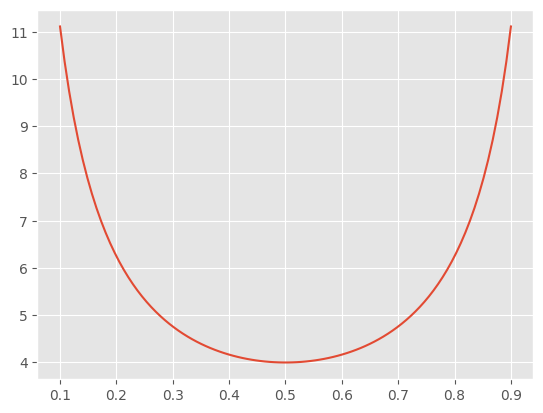

In [ ]:
p_i = np.linspace(0.1, 0.9, 100)
f_i = np.array([1/p/(1-p) for p in p_i])
plt.plot(p_i, f_i);

### ЗАДАНИЕ
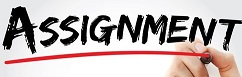

---
Для выведенных ниже плотностей распределения расставьте их в порядке возрастания информации Фишера:

1. A, B, C
2. A, C, B
3. C, A, B
4. C, B, A

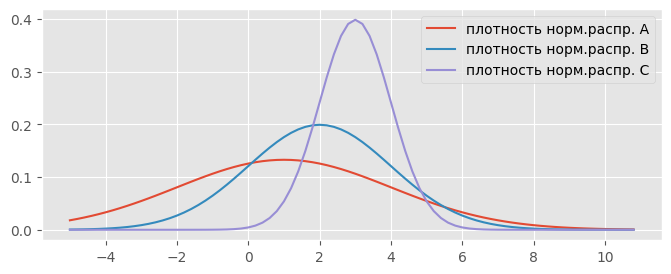

### ПРИМЕР с вычислением информации Фишера для НСВ
---

Рассмотрим СВ $X \in N(0, σ)$ (нормальный закон со средним = 0 и СКО = $σ$)

Оценим информацию Фишера для одного наблюдения.

1. Функция правдоподобия  (плотность распределения):
$$ϕ(x, σ) = \frac {1}{\sqrt{2π}σ} e^{- \frac {x^2}{2σ^2}}$$

2. Натуральный логарифм функции правдоподобия:
$$\ln ϕ(x, σ) = -\frac {1}{2} \ln(2π) - \lnσ - \frac {x^2}{2σ^2}$$

3. Частная производная по $σ$:
$$\frac {∂}{∂σ} \ln ϕ(x, σ) = - \frac {1}{σ} + \frac {x^2}{σ^3} = \frac {x^2 - σ^2}{σ^3} = \frac {\frac {x^2}{σ^2} - 1}{σ}$$


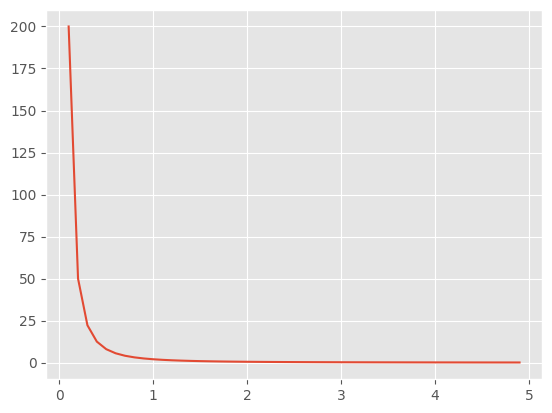

In [ ]:
from scipy import integrate
import scipy.stats as stat

def fisher_info(sigma, x_min = -20.0, x_max=20.0):
    norm_rv = stat.norm(loc=0, scale=sigma)
    d_logL = lambda x: ((x / sigma)**2 - 1) / sigma

    # зададим подинтегральные функции
    f = lambda x: norm_rv.pdf(x) * d_logL(x)**2

    # выполним интегрирование с помощью пакета
    info = round(integrate.quad(f, x_min, x_max)[0], 5)
    return info

sigma_min, sigma_max = 0.1, 5
sigmas = np.arange(sigma_min, sigma_max, 0.1)

fishers = [fisher_info(sigma) for sigma in sigmas]
plt.plot(sigmas, fishers);

## **Оценка Рао-Крамера**
---

Рассмотрим несмещенную оценку $\hat Θ(X)$ параметра $Θ$, т.е.

$$M[\hat Θ(X) - Θ | Θ] = \int (\hat Θ(x) - Θ) f_{X}(x, Θ) dx = 0, \; \forall Θ$$

Если независимо от значения $Θ$ это выражение равно 0, то и ее производная по $Θ$ также будет равна 0:

$$\frac {∂}{∂Θ} \int (\hat Θ(x) - Θ) f_{X}(x, Θ) dx = \int \frac {∂}{∂Θ} [(\hat Θ(x) - Θ) f_{X}(x, Θ)] dx = \int (\hat Θ(x) - Θ) \frac {∂}{∂Θ} f dx - \int f dx = 0$$

так как $\int f dx = 1$
и
$$\frac {∂}{∂Θ} f = f \frac {∂}{∂Θ} \log f, $$

то получим:

$$\int (\hat Θ(x) - Θ) f \frac {∂}{∂Θ}(\log f) dx = 1$$

Возведем левую и правую части в квадрат, выделим множители и, используя неравенство Коши-Шварца
$$(\int f(x) g(x) dx)^2 \le \int f^2(x) dx \cdot \int g^2(x) dx$$

получим:

$$1 = [\int (\hat Θ(x) - Θ) \cdot f \cdot \frac {∂}{∂Θ}(\log f) dx]^2 \le [\int (\hat Θ - Θ)^2 f dx] \cdot [\int (\frac {∂}{∂Θ}(\log f))^2 f dx] = D_{\hat Θ} \cdot ℱ(Θ)$$

отсюда следует оценка Рао-Крамера снизу для дисперсии $\hat Θ$:
$$D_{\hat Θ} \cdot ℱ(Θ) \ge 1$$
$$D_{\hat Θ} \ge \frac {1}{ℱ(Θ)}$$

Т.е. если для несмещенной оценки  $$D_{\hat Θ} = \frac {1}{ℱ(Θ)},$$

то это и есть самая эффективная оценка.


## **Resume**
---
> Нас будут интересовать статистики $\hat Θ_n = f(\bar X)$, которые:
- являются несмещенными (или ассимптотически несмещенными): $M[\hat θ_n] = θ$;
- являются состоятельными: $\hat θ_n →^p_{n →∞} θ$;
- имеют как можно меньшую дисперсию $D_{\hat Θ}$;

> функция правдоподобия для выборки $\bar X = (X_1, .., X_n)$ СВ X с законом распределения $f_X(x, θ)$, зависящем от параметра $θ$ - это функция $L(θ | \bar X)$, которая равна (или пропорциональна) вероятности появления данной выборки при значении параметра $θ$;

> оценка максимального правдоподобия - это статистика, на которой достигается максимум функции правдоподобия (равенсто нулю производной от логарифма функции правдоподобия):
$$\hat θ = \arg\max_{θ \in Θ} L(θ | \bar X)$$

> информация Фишера - это дисперсия для производной от логарифма функции правдоподобия:
$$𝓕(\theta) = M[score^2(X, \theta)| Θ] = \int_ℜ (\frac {∂}{∂Θ} {\log L(\theta | x)})^2 \cdot f_X(x, \theta) dx$$
Она пропорциональна количеству информации, которое нам приносит одно наблюдение при данном значении параметра $θ$;

> дисперсия любой оценки параметра распределения не может быть меньше величины обратной к информации Фишера для этого параметра: $D_{\hat Θ} \ge \frac {1}{ℱ(Θ)}$; логично - чем больше информации приносит одно измерение, тем можно получить более эффективную оценку неизвестного параметра распределения.
